In [3]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

### Testing the dataset

In [4]:
# Testing the dataset 
path_single = r"/kaggle/input/landslide4sense/TrainData/img/image_2000.h5"
path_single_mask = r'/kaggle/input/landslide4sense/TrainData/mask/mask_2000.h5'

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


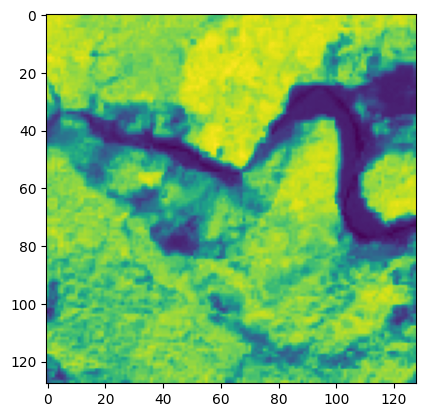

In [5]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


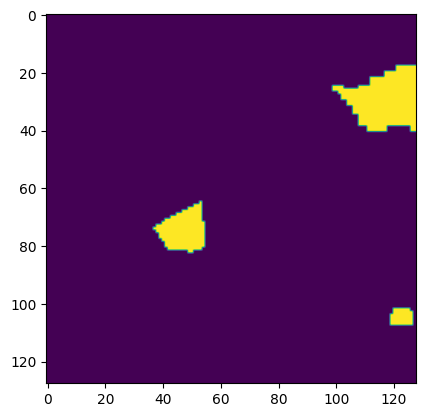

In [6]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [7]:
path_single = r"/kaggle/input/landslide4sense/TrainData/img/image_10.h5"
path_single_mask = r'/kaggle/input/landslide4sense/TrainData/mask/mask_1.h5'
TRAIN_PATH = r"/kaggle/input/landslide4sense/TrainData/img/*.h5"
TRAIN_MASK = r'/kaggle/input/landslide4sense/TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

### Train with RGB, NDVI, DEM, and Slope

In [9]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data

0 /kaggle/input/landslide4sense/TrainData/img/image_1.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1.h5
1 /kaggle/input/landslide4sense/TrainData/img/image_10.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_10.h5
2 /kaggle/input/landslide4sense/TrainData/img/image_100.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_100.h5
3 /kaggle/input/landslide4sense/TrainData/img/image_1000.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1000.h5
4 /kaggle/input/landslide4sense/TrainData/img/image_1001.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1001.h5
5 /kaggle/input/landslide4sense/TrainData/img/image_1002.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1002.h5
6 /kaggle/input/landslide4sense/TrainData/img/image_1003.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1003.h5
7 /kaggle/input/landslide4sense/TrainData/img/image_1004.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1004.h5
8 /kaggle/input/landslide4sense/TrainData/img/image_1005.h5 /kaggle/

/tmp/ipykernel_35/2015930227.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1671 /kaggle/input/landslide4sense/TrainData/img/image_2502.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2502.h5
1672 /kaggle/input/landslide4sense/TrainData/img/image_2503.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2503.h5
1673 /kaggle/input/landslide4sense/TrainData/img/image_2504.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2504.h5
1674 /kaggle/input/landslide4sense/TrainData/img/image_2505.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2505.h5
1675 /kaggle/input/landslide4sense/TrainData/img/image_2506.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2506.h5
1676 /kaggle/input/landslide4sense/TrainData/img/image_2507.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2507.h5
1677 /kaggle/input/landslide4sense/TrainData/img/image_2508.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2508.h5
1678 /kaggle/input/landslide4sense/TrainData/img/image_2509.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2509.h5
1679 /kaggle/input/landslide4sen

/tmp/ipykernel_35/2015930227.py:18: RuntimeWarning: divide by zero encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
/tmp/ipykernel_35/2015930227.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2265 /kaggle/input/landslide4sense/TrainData/img/image_3037.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3037.h5
2266 /kaggle/input/landslide4sense/TrainData/img/image_3038.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3038.h5
2267 /kaggle/input/landslide4sense/TrainData/img/image_3039.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3039.h5
2268 /kaggle/input/landslide4sense/TrainData/img/image_304.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_304.h5
2269 /kaggle/input/landslide4sense/TrainData/img/image_3040.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3040.h5
2270 /kaggle/input/landslide4sense/TrainData/img/image_3041.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3041.h5
2271 /kaggle/input/landslide4sense/TrainData/img/image_3042.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3042.h5
2272 /kaggle/input/landslide4sense/TrainData/img/image_3043.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3043.h5
2273 /kaggle/input/landslide4sense

### Testing min, max values in train data

In [10]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


### Custom loss function (Dice Loss)

In [11]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

### Visualization of the training data

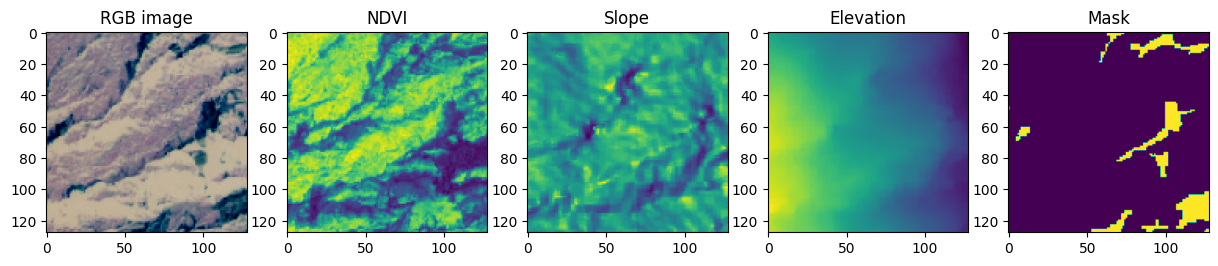

In [12]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

### Validation split

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

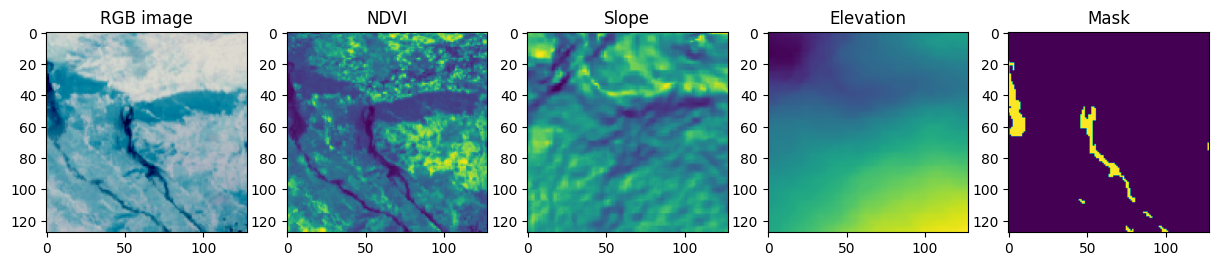

In [14]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [15]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

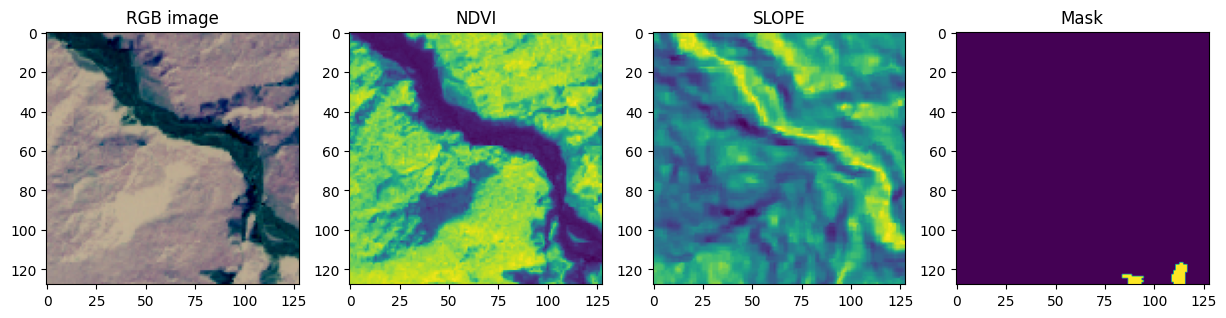

In [21]:
img=1634
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

# Unet Model

In [23]:
from tensorflow.keras import backend as K

# recall 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [24]:

def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [25]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=100, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.h5")

I0000 00:00:1750346569.237714      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750346569.237971      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 6))
  warnings.warn(msg)
I0000 00:00:1750346585.545686     130 service.cc:148] XLA service 0x7cbce8073170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750346585.546429     130 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750346585.546448     130 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750346586.770415     130 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1750346600.477082     130 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_f1_m improved from -inf to 0.58940, saving model to best_model.h5
190/190 - 51s - 271ms/step - accuracy: 0.9770 - f1_m: 0.2396 - loss: 0.0770 - precision_m: 0.5125 - recall_m: 0.1914 - val_accuracy: 0.9837 - val_f1_m: 0.5894 - val_loss: 0.0436 - val_precision_m: 0.6707 - val_recall_m: 0.5464
Epoch 2/100

Epoch 2: val_f1_m improved from 0.58940 to 0.63008, saving model to best_model.h5
190/190 - 8s - 43ms/step - accuracy: 0.9834 - f1_m: 0.5668 - loss: 0.0442 - precision_m: 0.7107 - recall_m: 0.4934 - val_accuracy: 0.9858 - val_f1_m: 0.6301 - val_loss: 0.0381 - val_precision_m: 0.7370 - val_recall_m: 0.5620
Epoch 3/100

Epoch 3: val_f1_m improved from 0.63008 to 0.66868, saving model to best_model.h5
190/190 - 8s - 44ms/step - accuracy: 0.9852 - f1_m: 0.5999 - loss: 0.0398 - precision_m: 0.7542 - recall_m: 0.5185 - val_accuracy: 0.9870 - val_f1_m: 0.6687 - val_loss: 0.0339 - val_precision_m: 0.7475 - val_recall_m: 0.6147
Epoch 4/100

Epoch 4: val_f1_m did not improve from 0

In [26]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.03236633539199829 0.9887018203735352 0.7273757457733154 0.7658553123474121 0.6968510746955872


## Prediction

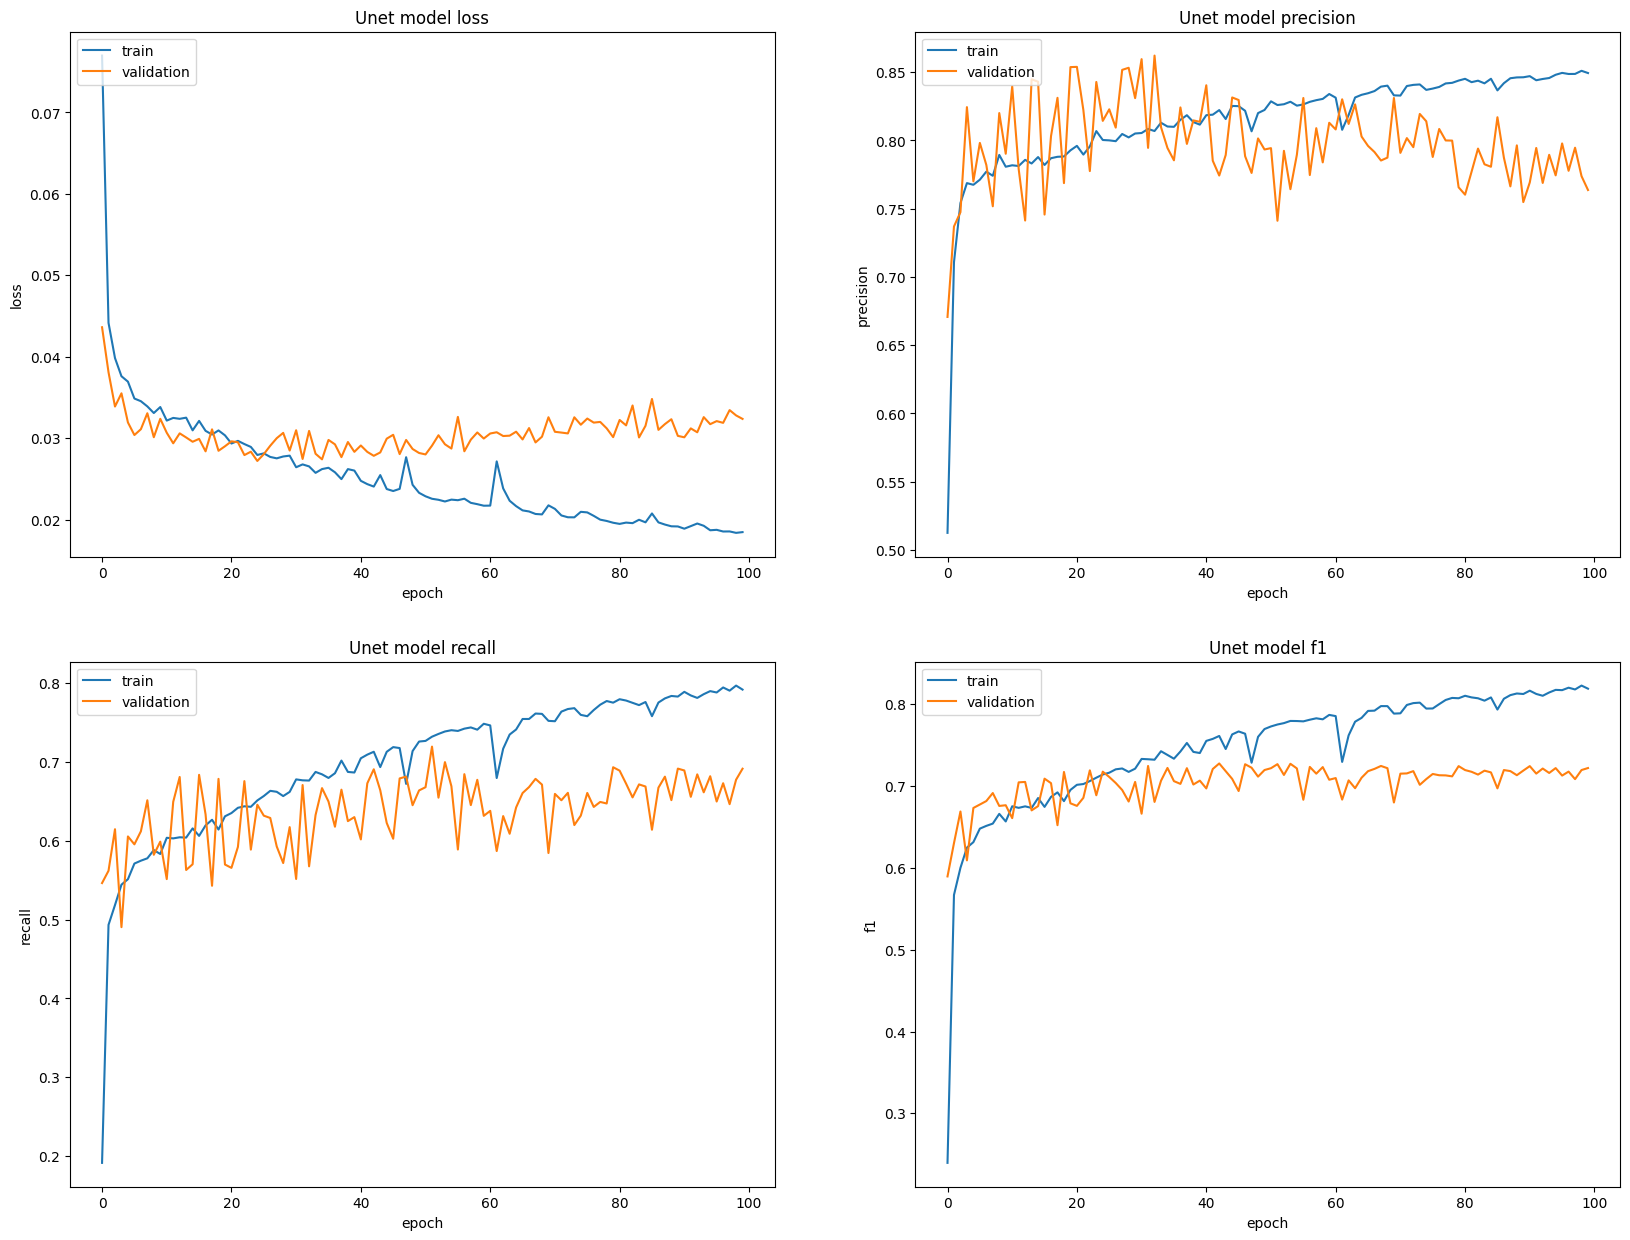

In [27]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [28]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 6))
  warnings.warn(msg)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


Text(0.5, 1.0, 'Training Image')

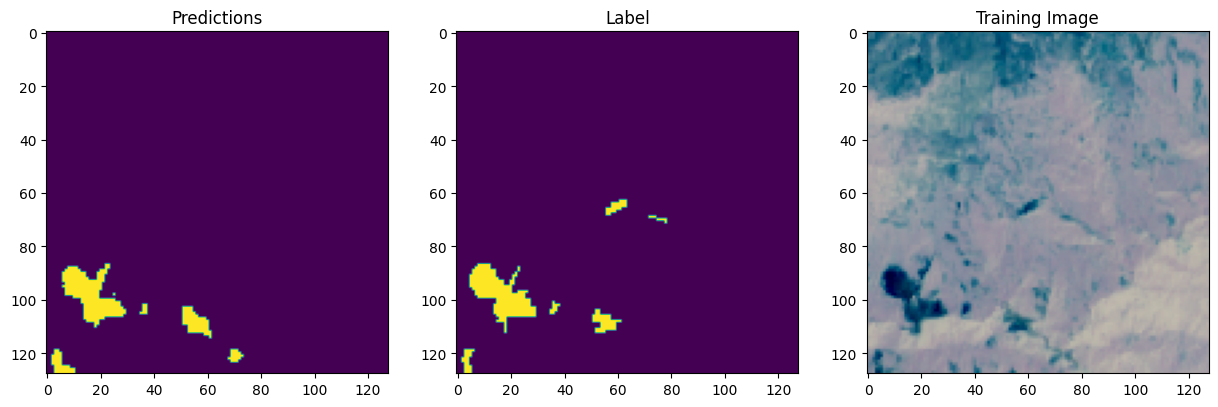

In [33]:
img = 212
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

Text(0.5, 1.0, 'Training Image')

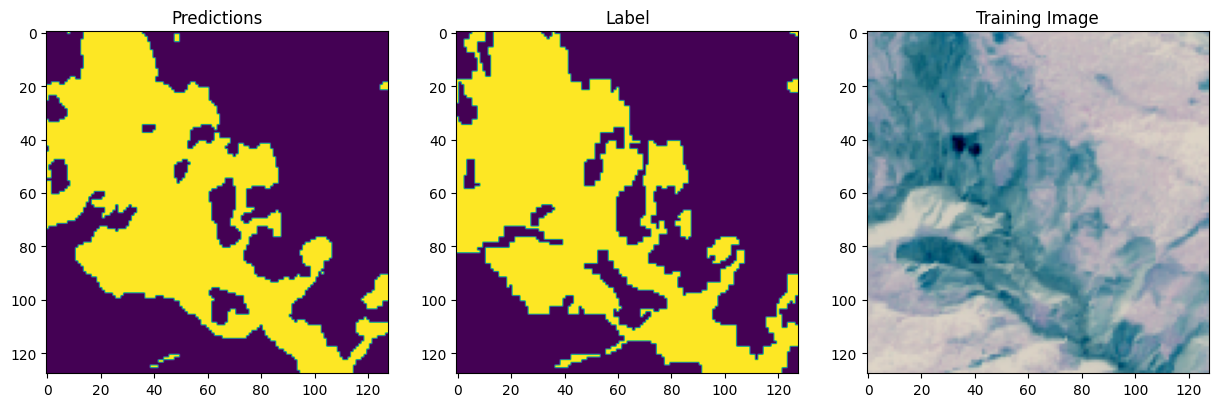

In [34]:
img = 165
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

### Validation data

In [35]:
validation_url = r'/kaggle/input/landslide4sense/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 /kaggle/input/landslide4sense/ValidData/img/image_1.h5
1 /kaggle/input/landslide4sense/ValidData/img/image_10.h5
2 /kaggle/input/landslide4sense/ValidData/img/image_100.h5
3 /kaggle/input/landslide4sense/ValidData/img/image_101.h5
4 /kaggle/input/landslide4sense/ValidData/img/image_102.h5
5 /kaggle/input/landslide4sense/ValidData/img/image_103.h5
6 /kaggle/input/landslide4sense/ValidData/img/image_104.h5
7 /kaggle/input/landslide4sense/ValidData/img/image_105.h5
8 /kaggle/input/landslide4sense/ValidData/img/image_106.h5
9 /kaggle/input/landslide4sense/ValidData/img/image_107.h5
10 /kaggle/input/landslide4sense/ValidData/img/image_108.h5
11 /kaggle/input/landslide4sense/ValidData/img/image_109.h5
12 /kaggle/input/landslide4sense/ValidData/img/image_11.h5
13 /kaggle/input/landslide4sense/ValidData/img/image_110.h5
14 /kaggle/input/landslide4sense/ValidData/img/image_111.h5
15 /kaggle/input/landslide4sense/ValidData/img/image_112.h5
16 /kaggle/input/landslide4sense/ValidData/img/image_1

/tmp/ipykernel_35/1734249096.py:24: RuntimeWarning: divide by zero encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
/tmp/ipykernel_35/1734249096.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


167 /kaggle/input/landslide4sense/ValidData/img/image_29.h5
168 /kaggle/input/landslide4sense/ValidData/img/image_3.h5
169 /kaggle/input/landslide4sense/ValidData/img/image_30.h5
170 /kaggle/input/landslide4sense/ValidData/img/image_31.h5
171 /kaggle/input/landslide4sense/ValidData/img/image_32.h5
172 /kaggle/input/landslide4sense/ValidData/img/image_33.h5
173 /kaggle/input/landslide4sense/ValidData/img/image_34.h5
174 /kaggle/input/landslide4sense/ValidData/img/image_35.h5
175 /kaggle/input/landslide4sense/ValidData/img/image_36.h5
176 /kaggle/input/landslide4sense/ValidData/img/image_37.h5
177 /kaggle/input/landslide4sense/ValidData/img/image_38.h5
178 /kaggle/input/landslide4sense/ValidData/img/image_39.h5
179 /kaggle/input/landslide4sense/ValidData/img/image_4.h5
180 /kaggle/input/landslide4sense/ValidData/img/image_40.h5
181 /kaggle/input/landslide4sense/ValidData/img/image_41.h5
182 /kaggle/input/landslide4sense/ValidData/img/image_42.h5
183 /kaggle/input/landslide4sense/ValidDat

### Prediction for validation data

In [36]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step


/tmp/ipykernel_35/1611732884.py:3: RuntimeWarning: invalid value encountered in greater
  pred_img = (pred_img > threshold).astype(np.uint8)


(245, 128, 128, 1)

### Visualization of validation image

Text(0.5, 1.0, 'Training Image')

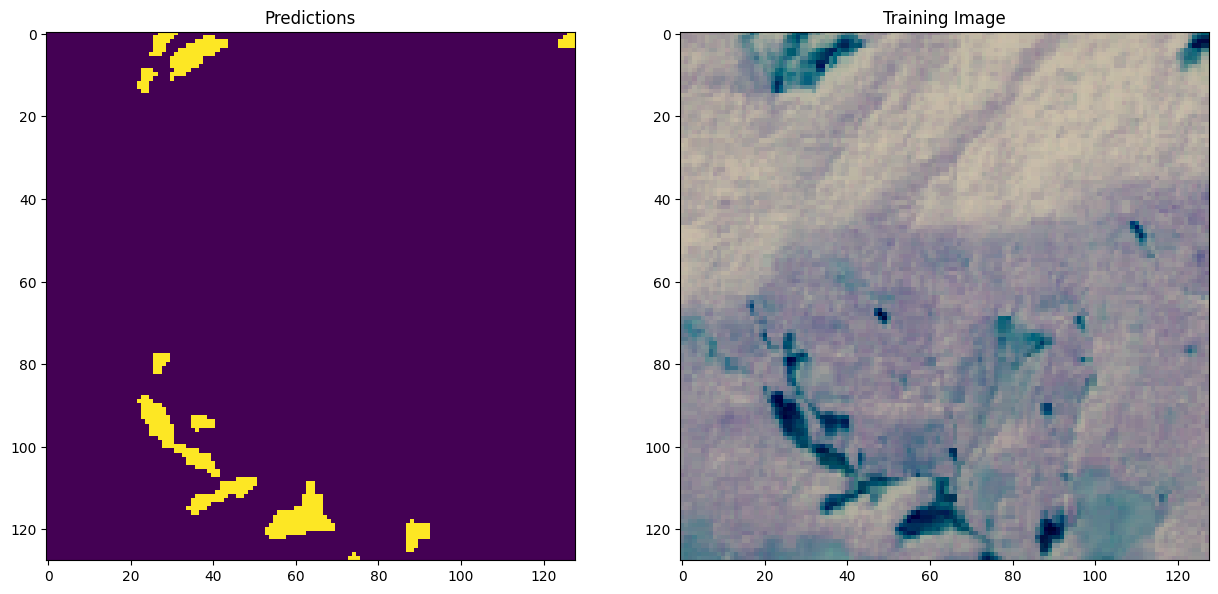

In [37]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')